<a href="https://colab.research.google.com/github/amiinaaa/Handwritten-digit-recognition/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv#une bibliothèque de traitement d'images,reconnaissance d'objets...
import numpy as np#tableaux
import matplotlib.pyplot as plt#graphes
import tensorflow as tf#apprentissage automatique et le traitement de données

Les données d'entraînement et de test sont divisées en deux ensembles, les images (x_train, x_test) et les étiquettes (y_train, y_test). Les images représentent les données d'entrée du modèle, tandis que les étiquettes représentent les sorties attendues pour chaque image.

La normalisation des données est une étape importante dans la préparation des données pour l'apprentissage automatique, car elle permet d'ajuster les données dans une plage de valeurs commune et de les mettre à l'échelle.

La fonction normalize() normalise les données d'entraînement en divisant chaque valeur de pixel par la norme L2 de l'image. Elle utilise l'argument "axis=1" pour normaliser chaque ligne de l'image séparément. Cela permet de normaliser chaque image indépendamment des autres, ce qui est important car les images peuvent avoir des plages de valeurs différentes.

In [ ]:
mnist = tf.keras.datasets.mnist#est un ensemble de données de reconnaissance de chiffres manuscrits largement utilisé dans le domaine de l'apprentissage automatique. Il est constitué d'un ensemble de 60 000 images d'entraînement et d'un ensemble de test de 10 000 images
#des images en niveaux de gris de 28x28 pixels, centrées autour du chiffre manuscrit.
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#Cette technique permet de stocker plusieurs valeurs retournées par une fonction dans plusieurs variables en une seule ligne de code
#charge les données d'entraînement et de test de l'ensemble de données
x_train = tf.keras.utils.normalize(x_train,axis=1)#normalise les données d'entrainement
x_test = tf.keras.utils.normalize(x_test,axis=1)

Creation et entrainement d'un neural network
Flatten=> takes the input data, which can be a 2D or 3D tensor(image or matrix), and reshapes it into a 1D tensor without changing the content of the data.
Dense=>is used to create a fully connected layer in a neural network. A dense layer connects each neuron in the layer to every neuron in the previous layer, forming a fully connected network. In a dense layer, each neuron applies a linear transformation to the inputs it receives, and passes the output through an activation function to produce its output value.
The softmax function is a type of activation function commonly used in the output layer of a neural network for multi-class classification problems.

In [ ]:
model = tf.keras.models.Sequential()#un type de modèle de réseau de neurones artificiels
#input layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#hidden layers
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))#Softmax converts the output of the model into a probability distribution over the possible classes.

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model
model.fit(x_train,y_train,epochs=3)

accuracy,loss = model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

model.save('digits.model')

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2608 - accuracy: 0.9245
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1058 - accuracy: 0.9682
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.9729
0.09267892688512802
0.9728999733924866


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 11.png to 11 (1).png
Saving 22.png to 22 (1).png
Saving 33.png to 33 (1).png
Saving 44.png to 44 (1).png
Saving 55.png to 55 (1).png


1/1 [==============================] - 0s 83ms/step
The result is probably:  1


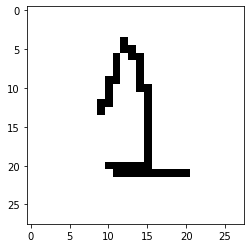

1/1 [==============================] - 0s 23ms/step
The result is probably:  6


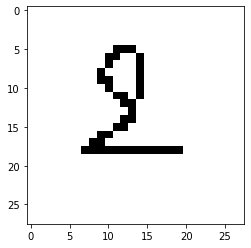

1/1 [==============================] - 0s 27ms/step
The result is probably:  3


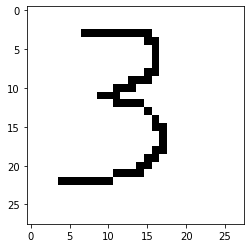

1/1 [==============================] - 0s 35ms/step
The result is probably:  1


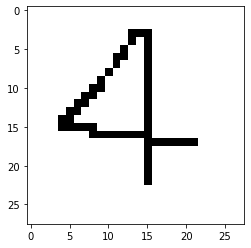

1/1 [==============================] - 0s 21ms/step
The result is probably:  3


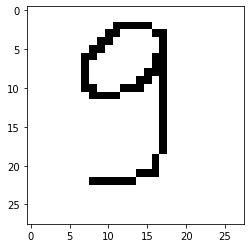

In [ ]:
for x in range(1,6):
  img = cv.imread(f'{x*10+x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print('The result is probably: ',(np.argmax(prediction)))
  plt.imshow(img[0],cmap=plt.cm.binary)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cloner le dépôt
!git clone https://github.com/amiinaaa/repository.git
%cd repository

# Copier votre fichier Python depuis Google Drive (ajustez le chemin)
!cp /content/drive/MyDrive/path_to_your_file.py .

# Ajouter les fichiers et faire un commit
!git add .
!git commit -m "Ajout du code de Google Colab"

# Pousser les changements vers GitHub
!git push https://<votre_nom_utilisateur>:<votre_jeton>@github.com/username/repository.git
